In [4]:
import numpy as np
import gym
import matplotlib.pyplot as plt


class Pacman_features_extractor(object):

    def __init__(self, initial_screen):
        self.guys_positions = {'pacman': None, 'ghosts': None}
        self.food_positions = {'foods': None, 'special_food': None}
        self.ghosts_scared = False
        self.epsilon = 3
        self.railwayGraph = RailwayGraph()
        
        initialize_foods()
        update(initial_screen)
        
    def update(self, screen):
        """
        Given a screen, it updates the position and state of all objects.
        """
        update_guys(screen)
        update_foods()

    
    ####### features #######
    
    def nearest_food_distance(self):
        """
        Returns the distance between the pacman beast and the nearest food.
        """
        return nearest_entity_distance_from_pacman('foods')
    
    def nearest_ghost_distance(self):
        """
        Returns the distance between the pacman beast and the nearest ghost.
        """
        return nearest_entity_distance_from_pacman('ghosts')
    
    def nearest_special_food_distance():
        """
        Returns the distance between the pacman beast and the nearest special food.
        """
        return nearest_entity_distance_from_pacman('special_food')
    
    def ghost_are_scared():
        """
        Return true if ghosts are scared, false otherwise.
        """
        return self.ghosts_scared                

    
    print("Warning: check the correctness of update_guys() method")
    def update_guys(self, screen):
        update_ghosts_scared(screen)
        raw_guys_positions = extract_raw_guys_positions(screen)
        self.guys_positions['pacman'] = self.railwayGraph.nearest_node_to_pixel(raw_guys_positions['pacman'])
        
        # case 1: ghost are visible (scared or not)
        if(raw_guys_positions['ghosts']!= []): # I hope this is the right condition
            for list_idx, pos in enumerate(raw_guys_positions['ghosts']):
                self.guys_positions['ghosts'][idx_list] = self.railwayGraph.nearest_node_to_pixel(pos)
                
        # case 2: ghost are not visible -> just do nothing, we keep the old positions
                
            
    def initialize_foods(self):
        """
        It set the initial position of every food based on a-priori knowledge.
        """
        
        foods_list = food_initial_raw_positions()
        foods_nodes = []
        for food_pos in foods_list:
            foods_nodes.append(self.railwayGraph.nearest_node_to_pixel(food_pos))
        self.food_positions['foods'] = foods_nodes
        
        sp_foods_list = sp_food_initial_raw_positions()
        sp_foods_nodes = []
        for sp_food_pos in sp_foods_list:
            sp_foods_nodes.append(self.railwayGraph.nearest_node_to_pixel(sp_food_pos))
        self.sp_food_positions['foods'] = sp_foods_nodes
        
            
    def update_foods(self):
        foods_distances = np.asarray([np.linalg.norm(food_pos - self.guys_positions['pacman'], ord=1)
                           for food_pos in self.food_positions['foods']])

        if np.min(foods_distances) < self.epsilon:
            self.food_positions['food'].pop(np.argmin(foods_distances))
            
        sp_foods_distances = np.asarray([np.linalg.norm(sp_food_pos - self.guys_positions['pacman'], ord=1)
                           for sp_food_pos in self.food_positions['special_food']])

        if np.min(sp_foods_distances) < self.epsilon:
            self.food_positions['special_food'].pop(np.argmin(sp_foods_distances))
            
            
    def nearest_entity_distance_from_pacman(self, entity_name):
        """
        Returns the distance between the pacman beast and a given entity.
        """
        
        beast_pos = guys_positions['pacman']
        
        # I need this if to generalize, maybe it would be better to have a unique dictionary of positions
        if(guys_positions[entity_name] != None): # check if works
            entity_positions = guys_positions[entity_name]
        else:
            entity_positions = food_positions[entity_name]
            
        return min([self.railwayGraph.get_distance(beast_pos, e_pos) for e_pos in entity_positions])
    
    
    def nearest_entity_distance_from_pacman_after_movement(self, movement, entity_name):
        """
        Returns the distance between the pacman beast and a given entity after a given movement of the beast.
        """
        
        beast_pos = guys_positions['pacman']
        
        # I need this if to generalize, maybe it would be better to have a unique dictionary of positions
        if(guys_positions[entity_name] != None): # check if works
            entity_positions = guys_positions[entity_name]
        else:
            entity_positions = food_positions[entity_name]
            
        return min([self.railwayGraph.get_distance_after_source_movement(beast_pos, movement, e_pos) for e_pos in entity_positions])

    
    def update_ghosts_scared(self, screen):
        """
        Update ghosts_scared variable according to the given screen.
        """
        
        self.ghosts_scared = False 
    
    
    def extract_raw_guys_positions(self, screen):
        """
        Returns a dictionary with the raw positions of all 'guys', extracted from the given screen.
        """
        guys_pos = PacmanAndGhostsCoords(screen)
        return {'pacman' : guys_pos[0], 'ghosts' : guys_pos[1]}
    
    
    def food_initial_raw_positions(self):
        """
        Returns a list with the raw positions of all initial foods known a-priori.
        """
        return list(np.load("saved_objects/food_coords.npy"))
    
    
    def sp_food_initial_raw_positions(self):
        """
        Returns a list with the raw positions of all initial foods known a-priori.
        """
        return list(np.load("saved_objects/special_food_coords.npy"))
        
        
    def center(self, SpecificMatrix):
        """
        Given a matrix with 1 where lies the object you want to detect and 0 elsewhere,
        the position of the center of the object is returned.
        """
        a = np.where(SpecificMatrix == 1)
        y = a[0]
        x = a[1]

        x_bar = (x.max() + x.min())/2
        y_bar = (y.max() + y.min())/2

        return (x_bar, y_bar)


    def find_location(self, screen, value):
        """
        Find the object corresponding to value within the matrix. If it is not present None is returned.
        """
        SpecificMatrix = (screen == value).astype(int)
        if SpecificMatrix.sum() == 0:
            return None
        else:
            return self.center(SpecificMatrix)

        
    def PacmanAndGhostsCoords(self, screen, PacmanValue=42, WallsFoodValue=74, GhostsValues=[70, 38, 184, 88], ghosts_scared=False):
        """
        Given the matrix of the screen, a list with the positions of all the relevant objects is returned.
        """
        pacman_coords = self.find_location(screen, PacmanValue)

        if ghosts_scared:
            pass
        else:
            ghosts_coords = []
            for ghost_value in GhostsValues:
                ghosts_coords.append(self.find_location(screen, ghost_value))

        return [pacman_coords, ghosts_coords]
        

In [5]:
import networkx as nx # great library that implements a lot of useful (and efficient) data structures and algorithms for graphs


class RailwayGraph(object):
    '''
    Graph of all the pixels which can be crossed at any time by Pacman.
    In order to be a node, a pixel needs to lie in a corridor. Each different pixel
    can be connected to any of the four Von Neumann neighbors (up, right, down, left), provided 
    they are admissible. The NetworkX library is used.
    '''

    def __init__(self):
        '''
        Initializes the empty graph.
        '''
        self.graph = nx.Graph() # NetworkX-provided data structure to represent a graph
        self.directions = {'up' : (-1, 0), 'down' : (1, 0), 'right' : (0, 1), 'left' : (0, -1)}
   

    def create_graph(self, rails_map, corridors_color):
        # ce lo salviamo
        '''
        Initializes the graph. It loop over every corridor pixel over the rails_map matrix and adds 
        its corresponding node. For each new node, the presence of neighbors is checked, and they are 
        eventually added. Finally, those pixel who are not
        '''
        m, n = np.shape(rails_map)
        
        # Loop over all pixels
        for row in range(m):
            for col in range(n):
                color = rails_map[row, col]
                if (color == corridors_color) and ((row, col) not in self.graph.nodes): # if corridor
                    self.graph.add_node((row, col)) #add node to the graph
                    
                    # Loop over the neighbors and establish edge if necessary
                    for offset in [(0, 1), (0, -1), (-1, 0), (1, 0)]:
                        neighbor = (row + offset[0], col + offset[1])
                        
                        if (0 <= neighbor[0] <= m-1) \
                        and (0 <= neighbor[1] <= n-1) \
                        and (rails_map[neighbor[0], neighbor[1]] == corridors_color): # if not out of bounds and colored appropriately
                            self.graph.add_edge((row, col), neighbor)
            
            
    def nearest_node_to_pixel(self, pixel_coords):
        """
        This function looks for the node which has the closest key to the given pixel (L1 distance)
        and returns a tuple with its coordinates.
        """
        nodes_arr = np.asarray(self.graph.nodes())

        closest_node = nodes_arr[np.argmin(np.linalg.norm(nodes_arr - pixel_coords, ord=1, axis=1))]
        return tuple(closest_node)
    
    
    def get_distance(self, source, target):
        '''
        Computes the shortest distance from source to target.
        Source is likely to be Pacman, while targets can be the ghosts for example.
        '''
        return nx.shortest_path_length(self.graph, source, target)
    
    def get_distance_after_source_movement(self, source, movement, target):
        '''
        Computes the shortest distance from the source after a given movement to target.
        Source is likely to be Pacman, while targets can be the ghosts for example.
        '''
        return nx.shortest_path_length(self.graph, nextNode(source, movement), target)

    
    def nextNode(self, currentNode, movement):
        """
        Returns the node of the graph reached performing a step in a given direction from a given node.
        """
        possibleMovements = self.getPossibleMovements(currentNode)
        if movement in possibleMovements:
            return (node[0] + self.directions[movement][0], node[1] + self.directions[movement][1])
        else:
            return currentNode
    
    
    def getPossibleActions(self, node):
        """
        Returns the list of possible movements (up, down, right, left) that can be done starting
        from a given node of the graph.
        """
        neighbours = self.getNeighbours(node)
        possibleActions = []
        for action in self.directions.keys():
            newNode = (node[0] + self.directions[action][0], node[1] + self.directions[action][1])
            if (newNode in neighbours):
                possibleActions.append(action)
        return possibleActions
    
    
    def getNeighbours(self, node):
        """
        Returns the list of neighbors of a given node in the graph.
        """
        neighbours = []
        for neighbour in nx.all_neighbors(self.graph, node):
            neighbours.append(neighbour)
        return neighbours
    

[[1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


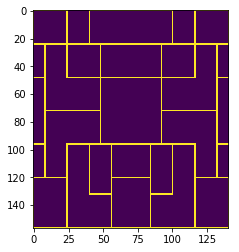

In [6]:
rail_map = np.load("saved_objects/rails_matrix.npy").astype(int)
print(rail_map[:10, :10]) # the corridors have the value 1, the walls have 0

plt.imshow(rail_map)
plt.show()

In [10]:
test = RailwayGraph()
test.create_graph(rail_map, corridors_color=1)

nodes_number = len(test.graph.nodes)
print("This graph contains {} nodes.".format(nodes_number))

for node in nx.all_neighbors(test.graph, (0, 1)):
    print(node)
    
test.getPossibleActions((0, 0))

This graph contains 1686 nodes.
[(0, 0), (0, 1), (1, 0), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (1, 24), (0, 40), (0, 41), (1, 40), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 58), (0, 59), (0, 60), (0, 61), (0, 62), (0, 63), (0, 64), (0, 65), (0, 66), (0, 67), (0, 68), (0, 69), (0, 70), (0, 71), (0, 72), (0, 73), (0, 74), (0, 75), (0, 76), (0, 77), (0, 78), (0, 79), (0, 80), (0, 81), (0, 82), (0, 83), (0, 84), (0, 85), (0, 86), (0, 87), (0, 88), (0, 89), (0, 90), (0, 91), (0, 92), (0, 93), (0, 94), (0, 95), (0, 96), (0, 97), (0, 98), (0, 99), (0, 100), (1, 100), (0, 116), (0, 117), (1, 116), (0, 118), (0, 119), (0, 120), (0, 121), (0, 122), (0, 123), (0, 124), (0, 125), (0, 126), (0, 127), (0, 128), (0, 129), (0, 130), (0, 13

['down', 'right']

In [57]:
(150, 0) in list(test.graph.node)


True

In [7]:
# Find and display the shortest path between two random nodes

starting_point = tuple(np.asarray(test.graph.nodes)[np.random.randint(nodes_number)])
target_point = tuple(np.asarray(test.graph.nodes)[np.random.randint(nodes_number)])

distance = test.get_distance(starting_point, target_point)

test.display_path(starting_point, target_point)
print("The distance from {} to {} is: {}" \
      .format(starting_point, target_point, distance))

NameError: name 'test' is not defined

#/home/fra/Softwares/anaconda3/envs/gym_env/lib/python3.6/site-packages/ipykernel_launcher.py -f /run/user/1001/jupyter/kernel-7440b90b-0725-4135-a4f5-b7005986cc81.json
# GMT Wed Feb 20 16:06:24 2019
# 
(0, 0) (1, 0) (0, 1)
(0, 1) (1, 1) (0, 2)
(0, 2) (1, 2) (0, 3)
(0, 3) (1, 3) (0, 4)
(0, 4) (1, 4)
(1, 0) (2, 0) (1, 1)
(1, 1) (2, 1) (1, 2)
(1, 2) (2, 2) (1, 3)
(1, 3) (2, 3) (1, 4)
(1, 4) (2, 4)
(2, 0) (3, 0) (2, 1)
(2, 1) (3, 1) (2, 2)
(2, 2) (3, 2) (2, 3)
(2, 3) (3, 3) (2, 4)
(2, 4) (3, 4)
(3, 0) (4, 0) (3, 1)
(3, 1) (4, 1) (3, 2)
(3, 2) (4, 2) (3, 3)
(3, 3) (4, 3) (3, 4)
(3, 4) (4, 4)
(4, 0) (4, 1)
(4, 1) (4, 2)
(4, 2) (4, 3)
(4, 3) (4, 4)
(4, 4)


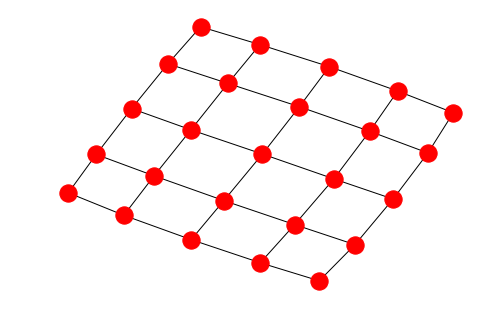

In [32]:
import sys

import matplotlib.pyplot as plt
import networkx as nx

G = nx.grid_2d_graph(5, 5)  # 5x5 grid
try:  # Python 2.6+
    nx.write_adjlist(G, sys.stdout)  # write adjacency list to screen
except TypeError:  # Python 3.x
    nx.write_adjlist(G, sys.stdout.buffer)  # write adjacency list to screen
# write edgelist to grid.edgelist
nx.write_edgelist(G, path="grid.edgelist", delimiter=":")
# read edgelist from grid.edgelist
H = nx.read_edgelist(path="grid.edgelist", delimiter=":")

nx.draw(H)
plt.show()